# Анализ рынка компьютерных игр

# Описание проекта
Проект представляет собой работу в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Открыла файл с данными и изучила общую информацию

В в названиях столбцов буквы в разном регистре, это необходимо исправить. Также, в столбцах есть пропуски и неверно определенный тип в столбце `year_of_release` и `user_score`

Перехожу к этапу предобработки для исправления недочетов

## Предобработка данных

### Меняю названия столбцов, привожу к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с пропусками

Перед тем, как изменить тип данных на целые числа в столбце `year_of_release` необходимо избавиться от пропусков. Причина пропусков может быть любая, поэтому пропуски лучше будет удалить. После же изменяю тип на int

In [6]:
data = data.dropna(subset =['year_of_release'])
data['year_of_release'].isna().sum()

0

В столбцах с названием и жанром есть по паре пропусков, это очень важные параметры, поэтому удаляю пропуски, чтобы дальнейшее исследование было более достоверным

In [7]:
data = data.dropna(subset =['name'])
data['name'].isna().sum()

0

In [8]:
data = data.dropna(subset =['genre'])
data['genre'].isna().sum()

0

### Изменение типа данных

Изменю тип данных на десятичные дробные числа в столбце `user_score` и принудительно заменяю некорректные значения на пропуски, также исправлю тип в `year_of_release`

In [9]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'],  errors='coerce')

### Продолжаю работу с пропусками

В столбцах `user_score` и `critic_score` заменю пропуски значением заглушкой -1, так как оценки это очень индивидуальный показатель. Пропусков в этих столбцах достаточно много, поэтому лучше будет их не оставлять, а заменить фиктивным значением

In [11]:
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'].isna().sum()

0

In [12]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'].isna().sum()

0

Столбец с возрастным рейтингом типа obj, я предполагаю, что пропуски в нем появились по причине невыставления рейтинга на некоторые игры/ по другим техническим причинам. Заменяю пропуски значением unknown

In [13]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].isna().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Добавляю новый столбец с общими продажами по всем регионам

In [15]:
data['full_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


### Работа с дубликатами

In [16]:
display(data['platform'].value_counts())
display(data['genre'].value_counts())
data['rating'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

Неявных дубликатов не найдено

### Вывод по предобработке данных

1. Названия столбцов привела к одному регистру
2. Поменяла типы в столбцах `year_of_release` и `user_score` для дальнейшей удобной работы
3. Заменила пропуски медианными значениями по платформам в столбцах `user_score` и `critic_score`
4. Удалила пропуски в столбцах `name` и `genre`
5. Пропуски в `rating` заменила на unknown

## Исследовательский анализ данных

### Cколько игр выпускали в разные годы

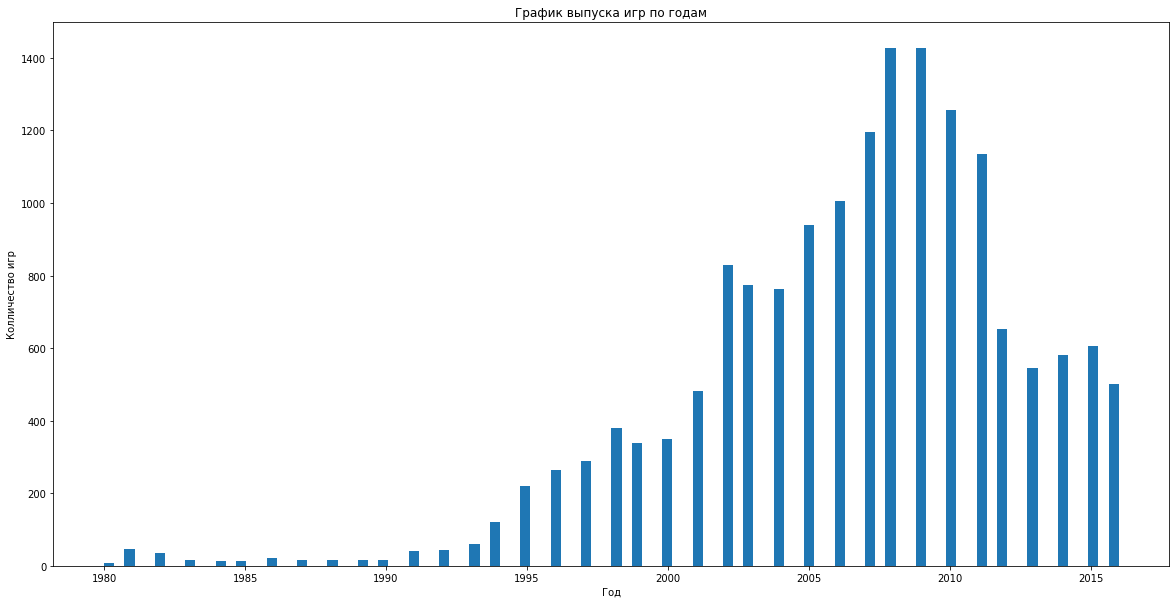

1980

2016

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [17]:
data['year_of_release'].plot.hist(bins= 100, range =(1980,2016), title = 'График выпуска игр по годам', figsize =(20,10))
plt.ylabel('Колличество игр')
plt.xlabel('Год')
plt.show()
display(data['year_of_release'].min())
display(data['year_of_release'].max())
display(data.groupby('year_of_release')['name'].count())

Больше всего выпускали игр в период с 2002 по 2011. За важные периоды возьмем все начиная с 1994 года, так как ранее выпускали менее 100 игр в год

Период, когда игры выпускали по нашим данным - с 1980 по 2016

### Как менялись продажи игр по платформам

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: full_sales, dtype: float64

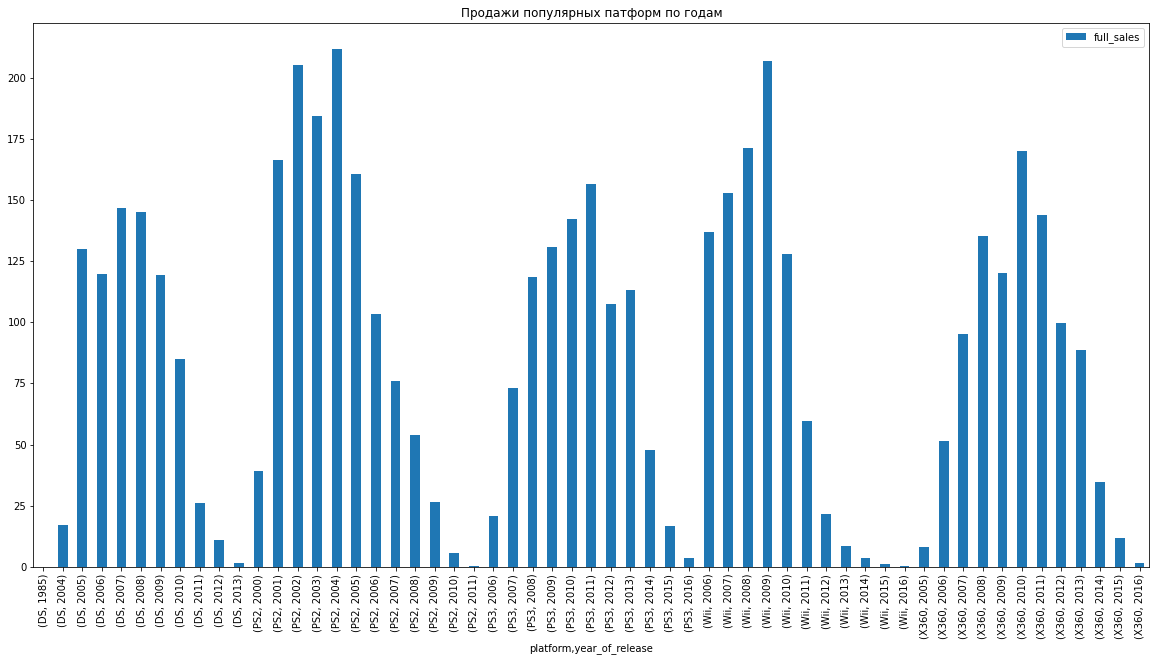

In [18]:
display(data.groupby('platform')['full_sales'].sum().sort_values(ascending=False))
top_platform = data.query('platform == ["PS2","X360","PS3","Wii","DS"]').pivot_table(index = ['platform','year_of_release'], values = 'full_sales', aggfunc = ('sum')).plot.bar(figsize =(20,10), title = 'Продажи популярных патформ по годам')
top_platform;

Сгруппировала по платформам суммы всех продаж, выбрала 5 самых крупных платформ - PS2, X360, PS3, Wii, DS

Далее построила график и распределила продажи платформ по годам. Оказалось, что платформа 'живет' в среднем +-10 лет, а период с самыми крупными продажами у платформ +- 5 лет

###  Определю актуальный период для построения прогноза на 2017 год

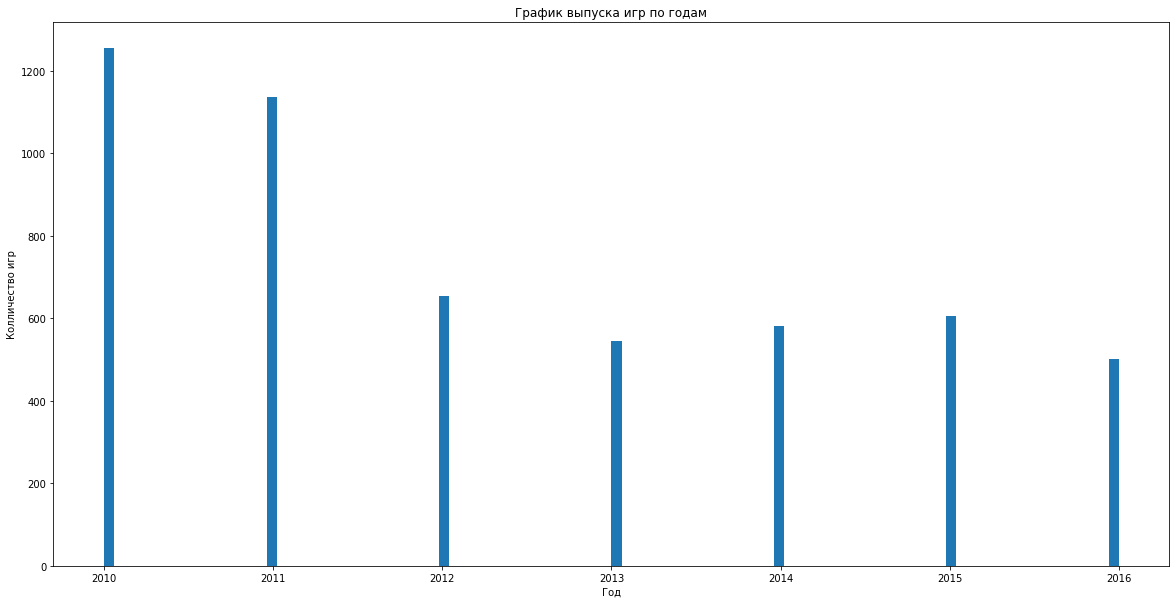

In [19]:
data['year_of_release'].plot.hist(bins= 100, range =(2010,2016), title = 'График выпуска игр по годам', figsize =(20,10))
plt.ylabel('Колличество игр')
plt.xlabel('Год')
plt.show()

In [20]:
data = data.query('year_of_release >= 2012')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


Для прогноза на 2017 год будем считать актуальный период с 2012 года, с того момента нет пиковых продаж, а значит и выдающихся больших значений. На более старые данные нет смысла обращать внимание для прогноза

### Посмотрю, какие платформы лидируют по продажам, растут или падают

<AxesSubplot:xlabel='platform'>

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: full_sales, dtype: float64

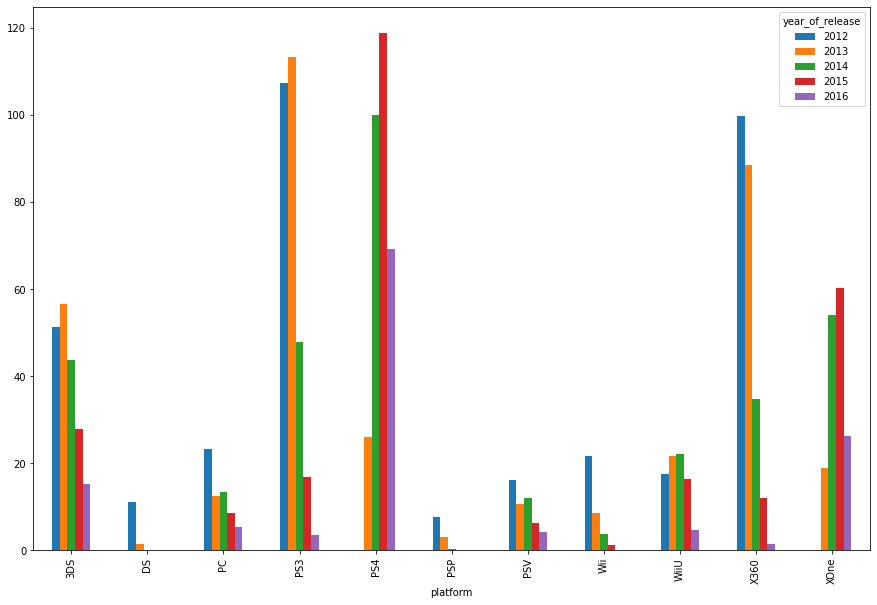

In [21]:
display(data.pivot_table(index = 'platform',columns = ['year_of_release'], values = 'full_sales', aggfunc = ('sum')).plot.bar(figsize =(15,10)))
display(data.groupby('platform')['full_sales'].sum().sort_values(ascending=False))

Судя по составленному ниже графику 3DS, PS4 и XOne являются перспективными платформами, так как рост их продаж к 2016 году выше по сравнению с остальными платформами

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам


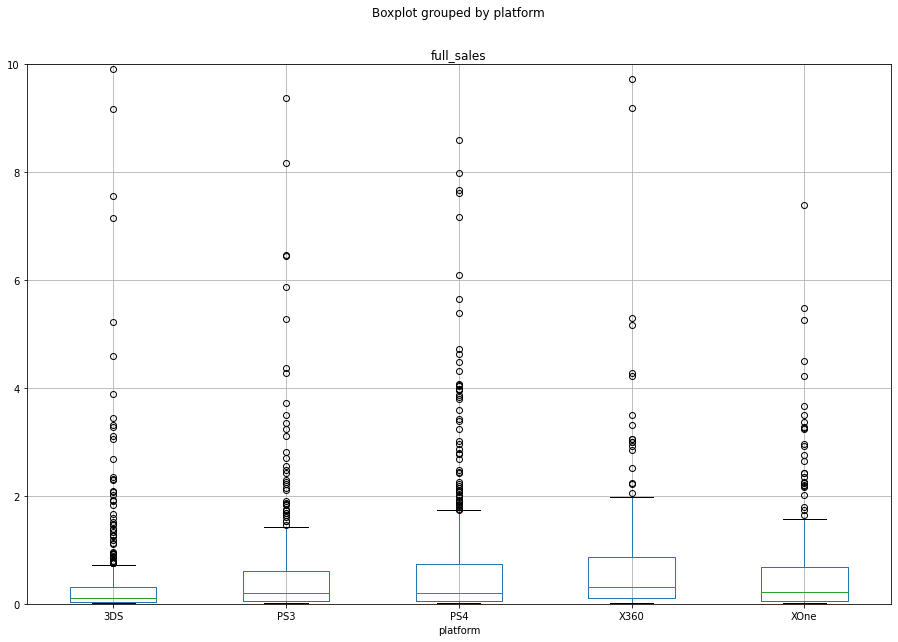

In [22]:
top_platform = data.query('platform == "PS4" or  platform =="PS3" or platform == "X360" or platform == "3DS" or platform == "XOne"')
top_platform
top_platform.boxplot(by = 'platform', column = 'full_sales', figsize =(15,10));
plt.ylim(0, 10);

Практически у всех платформ есть выбросы по общим продажам, некоторые из них очень высоко уходят от нормы

Такое и правда имеет место быть, так как некоторые платформы c большой вероятностью выпускали игры, которые становились в определенный период очень популярными и продажи соответственно подскакивали

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [23]:
display(data.query('platform == "XOne"')['full_sales'].corr(data['critic_score']))
data.query('platform == "XOne"')['full_sales'].corr(data['user_score'])

0.27378217261702115

0.12171152458232885

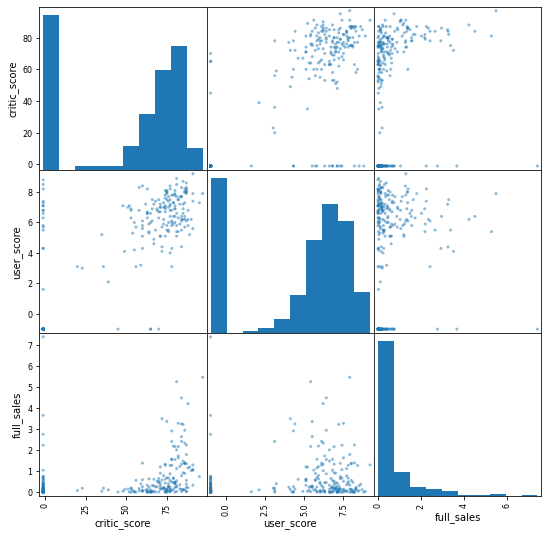

In [24]:
corr_of_score = data.query('platform == "XOne"')[['critic_score','user_score','full_sales']]
pd.plotting.scatter_matrix(corr_of_score, figsize=(9, 9));

Я взяла одну из популярных платформ по продажам игр XOne и высчитала зависимость количества продаж от оценок критиков и оценок пользователей

По диаграмме рассеяния и рассчитанной корреляции можно сделать следующие выводы:
    
1. Оценки крикитов совсем немного влияют на общие продажи игр - корреляция 0.3
2. Оценки пользователей показали отрицательнцю корреляцию, но абсолютно незначительную - 0.07


###  Соотнесу выводы с продажами игр на других платформах

In [25]:
display(data.query('platform == "PS4"')['full_sales'].corr(data['critic_score']))
data.query('platform == "PS4"')['full_sales'].corr(data['user_score'])

0.22652606614612347

0.1159614931286009

In [26]:
display(data.query('platform == "PS3"')['full_sales'].corr(data['critic_score']))
data.query('platform == "PS3"')['full_sales'].corr(data['user_score'])

0.29820434881006375

0.21737238590346158

In [27]:
display(data.query('platform == "X360"')['full_sales'].corr(data['critic_score']))
data.query('platform == "X360"')['full_sales'].corr(data['user_score'])

0.2609927620101844

0.10266997474596448

Проверила корреляцию общих продаж игр с оценками критиков и пользователей на других популярных платформах и могу сделать вывод, что практически у всех платформ оценки критиков влияют слабо и положительно - обычно корреляция 0.3 , а оценки пользователей влияют отрицательно и тоже очень слабо - обычно корреляция от 0.02 до 0.06

Оценки критиков и пользователей не зависят от большего или меньшего количества продаж

### Посмотрю распределение игр по жанрам

In [28]:
data.groupby('genre').agg({'full_sales':'mean','name':'count'}).sort_values(by = 'full_sales',ascending=False).rename(columns ={'name':'count_games'})

,full_sales,count_games
genre,,
Shooter,1.296723,235
Platform,0.717647,85
Sports,0.675634,268
Role-Playing,0.521081,370
Racing,0.465217,115
Misc,0.442917,192
Simulation,0.439000,80
Action,0.427856,1031
Fighting,0.408165,109


Самые прибыльные жанры - Shooter, Platform, Sports, Role-Playing. Игр в  жанре Platform не так много, по сравнению с другими прибыльными жанрами, но при этом по средним продажам этот жанр на втором месте

По продажам бесспорный лидер среди жанров - Shooter

А по количеству выпущенных игр побеждает Action, игр в этом жанре выпущенно 1031

Самые непопулярные жанры игр - Strategy, Puzzle и Adventure . Игр в жанре Adventure выпускаю достаточно много, более 300, но продажи в среднем самые низкие 

## Портрет пользователя по регионам

### Топ 5 популярных платформ по регионам

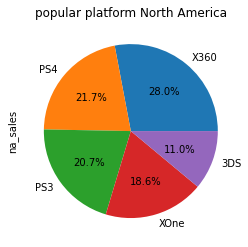

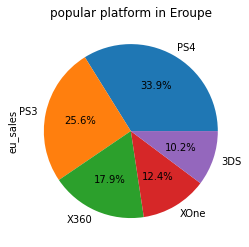

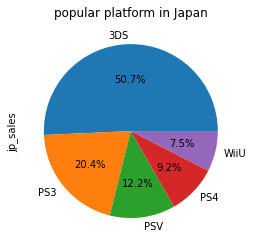

In [29]:
data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(kind = 'pie', autopct='%1.1f%%', title = 'popular platform North America')
plt.show()
data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind = 'pie', autopct='%1.1f%%', title = 'popular platform in Eroupe')
plt.show()
data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind = 'pie', autopct='%1.1f%%', title = 'popular platform in Japan');

В Северной Америке топ 5 по популярности платформ и сумма по продажам игр
1. X360    140.05
2. PS4     108.74
3. PS3     103.38
4. XOne     93.12
5. 3DS      55.31

Топ 5 поппулярных платформ и сумма продаж с игр в Европе
1. PS4     141.09
2. PS3     106.86
3. X360     74.52
4. XOne     51.59
5. 3DS      42.64

И наконец топ 5 популярных платформ и сумма с продажи всех игр в Японии
1. 3DS     87.79
2. PS3     35.29
3. PSV     21.04
4. PS4     15.96
5. WiiU    13.01

Больше продаж в Северной Америке, далее идет Европа и меньше всего продаж в Японии, что не удивительно, так как страна явно меньше

Популярность платфорим также разнится в зависимости от региона. Например, 3DS - самая популярная платформа в Японии, при этом на последнем месте в пятерке Америки и Европы. А X360, которая на 1 месте в Америке и 3м месте в Европе, вовсе не вошла в пятерку популярных платформ Японии

### Топ 5 популярных жанров по регионам

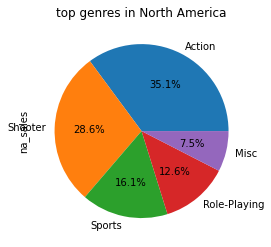

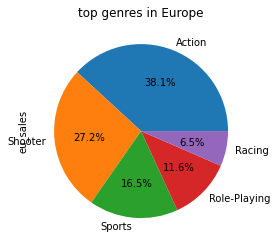

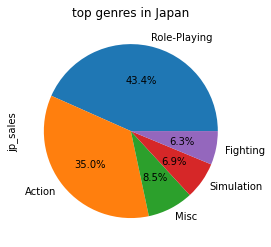

In [30]:
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(kind = 'pie', autopct='%1.1f%%', title = 'top genres in North America')
plt.show()
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind = 'pie', autopct='%1.1f%%', title = 'top genres in Europe')
plt.show()
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind = 'pie', autopct='%1.1f%%', title = 'top genres in Japan');

Статистика самых популярных жанров по регионам:
    
* В Северной Америке и Европе предпочтнеия в жанрах очень уж схожи. Топ по убыванию следующий - Action, Shooter, Sports, Role-Playing. На пятом же месте у Америки - Misc, а в Европе - Racing

* У Японцев жанровые предпочтения более уникальны - Role-Playing, Action, Misc, Simulation, Fighting - топ 5 по убыванию

Более наглядное процентное соотношение на графиках

### Влияние рейтинга ESRB на продажи в отдельном регионе

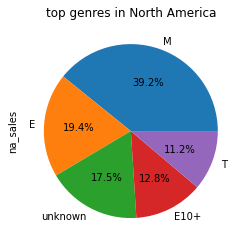

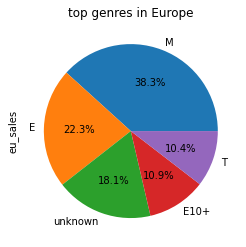

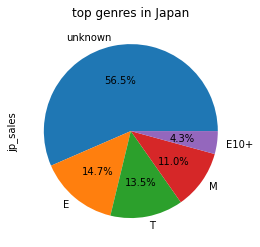

In [31]:
data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind = 'pie', autopct='%1.1f%%', title = 'top genres in North America')
plt.show()
data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind = 'pie', autopct='%1.1f%%', title = 'top genres in Europe')
plt.show()
data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind = 'pie', autopct='%1.1f%%', title = 'top genres in Japan');

Проверила влияние возрастного рейтинга на продажи игр в разных регионах. Могу сделать следующие выводы:
    
* В Северной Америке и в Европе бОльшую долю продаж занимают игры с рейтингами, только в 18% случаев рейтинг не влияет
* В Японии же наоборот, большую часть занимают игры без рейтинга - 57%
* В Америке и Европе самые продаваемые игры с рейтингом М - 38% и 39% соответственно. В Японии же этот рейтинг на предпоследнем месте по популярности - 11%


### Вывод по анализу поведения пользователей в разных регионах:

В каждом региона пользователи уникальны и со своими предпочтениями. Европейцы с американцами более схожи во вкусах в играх, а Японцы имеют больше отличий

## Проверка гипотез

### Первая гипотеза

* Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


* Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [32]:
alpha = 0.05

Xbox_One = data.query('platform == "XOne" and user_score != -1')
PC = data.query('platform == "PC"')

results = st.ttest_ind(Xbox_One['user_score'], PC['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Средние пользовательские рейтинги платформ Xbox One и PC разные')
else:
    print('Средние пользовательские рейтинги платформ Xbox One и PC одинаковые') 

p-значение: 1.997377456499021e-09
Средние пользовательские рейтинги платформ Xbox One и PC разные


Проверила первую гипотезу и получила вывод - средние пользовательские рейтинги платформ Xbox One и PC различаются

**Альтернативная гипотеза оказалась значимой**

### Вторая гипотеза
* Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые


* Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [33]:
alpha = 0.05

Action = data.query('genre == "Action"')
Sports = data.query('genre == "Sports"')

results = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Средние пользовательские рейтинги жанров Action и Sports одинаковые')

p-значение: 0.0020018209559324713
Средние пользовательские рейтинги жанров Action и Sports разные


Проверила вторую гипотезу. Оказалось, что средние пользовательские рейтинги жанров Action и Sports действительно различаются

**Альтернативная гипотеза оказалась значимой**

## Пояснения

**Как я сформулировали нулевую и альтернативную гипотезы?**

- Нулевую и альтернаивную гипотезы я сформировала исходя из запросов на проверку

Первая гипотеза звучала так : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Соответственно Н0: Xbox_One['user_score'] == PC['user_score']

Н1: Xbox_One['user_score'] != PC['user_score']


А вторая гипотеза звучала так : Средние пользовательские рейтинги жанров Action и Sports разные

Н0: Action['user_score'] == Sports['user_score']

Н1: Action['user_score'] != Sports['user_score']

**Какой критерий применили для проверки гипотез и почему?**

- Обе гипотезы двусторонние, о равенстве средних двух выборках, выборки независимые, поэтому я использовала метод ttest_ind()

# Общий вывод


1. После выгрузки данных я заметила некоторые недочеты, в виде пропусков, неверного типа данных и некорректных названиях в столбах. Устранила эти недочеты на этапе предобработки


2. Провела исследовательски анализ, в котором узнала следующее:

* Игры начали набирать большую популярность и чаще выпускаться с 2002  по 2011 год
---
* Выяснила, что платформа 'живет' в среднем +-10 лет, а период с самыми крупными продажами у платформ +- 5 лет
---
* Для прогноза на 2017 год я взяла данные начиная с 2012 года и выяснила, что 3DS, PS4 и XOne являются перспективными платформами
---
* У всех платформ есть выбросы с большими продажами, а у платформ PS4, PS3, X360, 3DS самый большой разброс по продажам, достигающий огромного размера
---
* Оценки критиков немного влияют на продажи крупных платформ - в среднем корреляция 0.3
---
* Оценки пользователей абсолютно незначительны и не влияют на продажикрупных платформ
---
* Топ 5 прибыльных жанров по убыванию - Shooter, Platform, Sports, Role-Playing и Racing, при прогнозировании стоит учитывать самые популярные жанры
---
* Топ 5 неприбыльных жанров  по убыванию - Action, Fighting, Strategy, Puzzle и Adventure


3. Выяснила, что у европейцев и американцев вкусы на игры очень схожи, а вот у японцев другие предпочтения. При прогнозировании на 2017 год следут учесть этот факт и ориентироваться на аудиторию пользователей по регионам:


* В Европе и Северной Америке пользователи отдают предпочтение одинаковым топ 5ти платформам - X360, PS4, PS3, XOne и 3DS
---
* А в Японии - 3DS, PS3, PSV, PS4, WiiU
---
* Что касается жанровых предпочтений, топ по убыванию следующий в Европе и Америке - Action, Shooter, Sports, Role-Playing. На пятом же месте у Америки - Misc, а в Европе - Racing
---
* В Японии топ 5 по убыванию - Role-Playing, Action, Misc, Simulation, Fighting 
---
* В Северной Америке и в Европе бОльшую долю продаж занимают игры с рейтингами, только в 18% случаев рейтинг не влияет
---
* В Японии же наоборот, большую часть занимают игры без рейтинга - 57%
---
* В Америке и Европе самые продаваемые игры с рейтингом М - 38% и 39%, для прогноза на 2017 год обязательно нужно учесть это. В Японии же этот рейтинг на предпоследнем месте по популярности - 11%

4. Проверила две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC разные
---
* Средние пользовательские рейтинги жанров Action и Sports разные

## Рекомендации

- Поскольку рост суммарных продаж показали платформы 3DS, PS4 и XOne, упор в 2017 году стоит также делать на них
---
- При этом не стоит забывать о "платформах гигантах": PS2, X360, PS3, Wii, DS. У них самые большие продажи за все время и их игры, скорее всего, уже стали классикой среди компьютерных игр
---
- Продажи игр не зависят от пользовательских отзывов совсем, а вот от критиков есть небольшая зависимость. При продаже игр в 2017 году нашему интернет магазину стоит иногда ориентироваться на оценки критиков
---
- Поскольку в каждом регионе разнятся предпочтеия, стоит и нам составлять рекомендации для пользователей в зависимости от региона их проживания
